<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Lab11_IU_Hany_Hamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Hany Hamed**

**Group: 6**


# Tasks
* Assume a f (t) = asin(ωt) + bcos(ωt) and add random noise.
Filter using Kalman filter. Plot the noisy and filtered signal.
* Assume a unit step function and add random noise. Filter
using Kalman filter. Plot the noisy and filtered signal.
* Assume a spring mass damper system with noise in the
measured states. Implement Kalman filter to filter out the
noise. Plot the results with and without the filter.

# Task 1


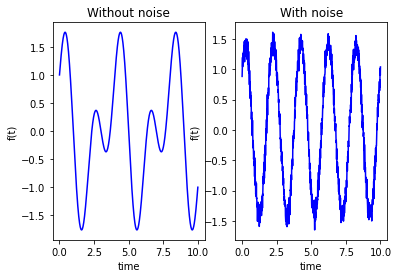

In [0]:
import matplotlib.pyplot as plt
from math import sin, cos
import numpy as np

a,b = 1,1
omega = 1
noise_coeff = 0.5
mu = 0
zzz
noise_stdev = 0.2


def sinFunc(t,omega=0.5):
  return np.sin(omega*np.pi*t)

def cosFunc(t,beta=0.5):
  return np.cos(beta*np.pi*t)

def fFunc(t,a=1,b=1,omega=0.5,beta=0.5):
  return a*sinFunc(t,omega) + b*cosFunc(t,beta)

def noisyFFunction(t, mu=0, stdev=1,a=1,b=1,omega=0.5, noise_coeff = 0.05):
  return fFunc(t,a,b,omega,omega) + noise_coeff*np.random.normal(mu, stdev)


time = np.linspace(0, 10, 1000)    # interval from 0 to 1

fVal = [fFunc(i,a=a,b=b,omega=omega) for i in time]
noisyFVal = [noisyFFunction(i,a=a,b=b,omega=omega,stdev=noise_stdev, noise_coeff=noise_coeff) for i in time]


plt.subplot(121)
plt.plot(time,fVal,"b")
plt.xlabel('time')
plt.ylabel('f(t)')
plt.title('Without noise')

plt.subplot(122)
plt.plot(time,noisyFVal,"b")
plt.xlabel('time')
plt.ylabel('f(t)')
plt.title('With noise')

plt.show()

# Kalman Filter Implementation

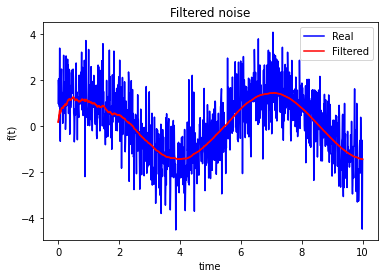

In [0]:
def A_mat(dt, omega=0.5):
  return np.array([[cos(omega*dt), sin(omega*dt)],
                  [-sin(omega*dt), cos(omega*dt)]])
def C_mat(a,b):
   return np.array([[a,b]])

def x_t(t,omega=omega):
  return np.array([[sin(omega*t)],[cos(omega*t)]])

dt = time[1] - time[0]
A = A_mat(dt,omega=omega)
B = np.zeros((2,1))
C = C_mat(a,b)

# init_x_t = np.array([np.random.rand(2),]).T
init_x_t = np.array([0,0]).T
cov_tmp = 0.05*np.eye(2,2)
init_cov_mat = np.array([cov_tmp, cov_tmp]) # 1st one is related to the priori and the 2nd one for the postriori

W = np.zeros((2,2))
V = noise_stdev*np.eye(1)

x_t_list = [] # Store the priori and the postriori estimate
y_list = []
y_list_true = []
x_t_loop = init_x_t
x_t_list.append((x_t_loop,x_t_loop))
cov_mat_loop = init_cov_mat


for i,t in enumerate(time):
  cov_mat_loop[0] = (A.dot(cov_mat_loop[1])).dot(np.transpose(A)) + W  # priori update for the covariance matrix  
  Y_loop = (C.dot(cov_mat_loop[0])).dot(np.transpose(C)) + V
  k_loop = (cov_mat_loop[0].dot(np.transpose(C))).dot(np.linalg.inv(Y_loop))
  cov_mat_loop[1] = (np.eye(2)-k_loop.dot(C)).dot(cov_mat_loop[0])  # postrori update for the covariance matrix
  xim1im1 = x_t_list[-1][1]
  x_t_loop = x_t(t,omega=omega) + noise_coeff*np.random.normal(mu, noise_stdev)
  y_loop = C.dot(x_t_loop)
  y_list_true.append(y_loop[0])
  xiim1 = A.dot(xim1im1)  + B # priori estimate
  xii = xiim1 + k_loop.dot(y_loop - C.dot(xiim1))
  x_t_list.append((xiim1, xii)) 
  y_list.append(C.dot(xii)[0])


pri_1 = [x[0] for x in x_t_list]
post = [x[1] for x in x_t_list]


post_y = [y for y in y_list]
# plt.subplot(313)
plt.plot(time,y_list_true,"b")
plt.xlabel('time')
plt.ylabel('f(t)')
# plt.plot(time,noisyFVal,"g")
# plt.xlabel('time')
# plt.ylabel('f(t)')
plt.plot(time,post_y,"r")
plt.xlabel('time')
plt.ylabel('f(t)')
plt.title('Filtered noise')
plt.legend(["Real", "Filtered"])

plt.show()

# Task 2


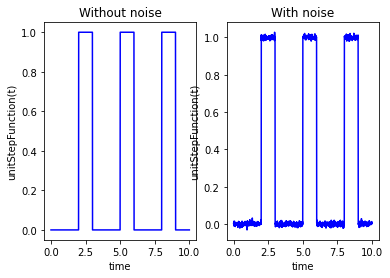

In [0]:
import matplotlib.pyplot as plt
from math import sin, cos
import numpy as np


low_time, high_time = 2, 1
noise_stdev = 1

global_flag = False
global_time = 0

# It will be better if it was implemented as a class instead of having the global variables (Modification to be made latter)
def unitStepFunc(t, lowt=2, hight=1):
  global global_flag
  global global_time

  if(t == 0):
    global_flag = False
    global_time = 0

  if((not global_flag and t > global_time + low_time) or global_flag and t > global_time + high_time):
    global_flag = not(global_flag) 
    global_time = t
  
  return int(global_flag)


def noisyUnitStepFunc(t, lowt=2, hight=1, mu=0, stdev=1, noise_coeff=0.009):
  return unitStepFunc(t,lowt=lowt,hight=hight) + noise_coeff*np.random.normal(mu, stdev)

time = np.linspace(0, 10, 1000)    # interval from 0 to 1


unitVal = [unitStepFunc(i,lowt=low_time,hight=high_time) for i in time]

noisyUnitVal = [noisyUnitStepFunc(i,lowt=low_time,hight=high_time,stdev=noise_stdev) for i in time]


plt.subplot(121)
plt.plot(time,unitVal,"b")
plt.xlabel('time')
plt.ylabel('unitStepFunction(t)')
plt.title('Without noise')

plt.subplot(122)
plt.plot(time,noisyUnitVal,"b")
plt.xlabel('time')
plt.ylabel('unitStepFunction(t)')
plt.title('With noise')

plt.show()

# Kalman Filter Implementation

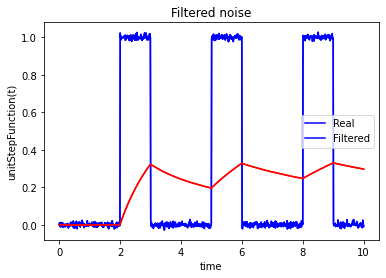

In [0]:
def A_mat(dt, omega=0.5):
  return np.array([[1, 0],
                  [0, 1]])
def C_mat(a,b):
   return np.array([[1,1]])

def x_t(t,omega=omega):
  return np.array([[1],[0]])

dt = time[1] - time[0]
A = A_mat(dt,omega=omega)
B = np.zeros((2,1))
C = C_mat(a,b)

init_x_t = np.array([0,0]).T
cov_tmp = 0.05*np.eye(2,2)
init_cov_mat = np.array([cov_tmp, cov_tmp]) # 1st one is related to the priori and the 2nd one for the postriori

W = np.zeros((2,2))
V = noise_stdev*np.eye(1)

x_t_list = [] # Store the priori and the postriori estimate
y_list = []
y_list_true = []
x_t_loop = init_x_t
x_t_list.append((x_t_loop,x_t_loop))
cov_mat_loop = init_cov_mat


for i,t in enumerate(time):
  cov_mat_loop[0] = (A.dot(cov_mat_loop[1])).dot(np.transpose(A)) + W  # priori update for the covariance matrix  
  Y_loop = (C.dot(cov_mat_loop[0])).dot(np.transpose(C)) + V
  k_loop = (cov_mat_loop[0].dot(np.transpose(C))).dot(np.linalg.inv(Y_loop))
  cov_mat_loop[1] = (np.eye(2)-k_loop.dot(C)).dot(cov_mat_loop[0])  # postrori update for the covariance matrix
  xim1im1 = x_t_list[-1][1]
  x_t_loop = noisyUnitStepFunc(t,lowt=low_time,hight=high_time,stdev=noise_stdev)
  y_loop = C.dot(x_t_loop)
  y_list_true.append(y_loop[0])
  xiim1 = A.dot(xim1im1)  + B # priori estimate
  xii = xiim1 + k_loop.dot(y_loop - C.dot(xiim1))
  x_t_list.append((xiim1, xii)) 
  y_list.append(C.dot(xii)[0])

pri_1 = [x[0] for x in x_t_list]
post = [x[1] for x in x_t_list]


post_y = [y for y in y_list]
# plt.subplot(313)
plt.plot(time,y_list_true,"b")
plt.xlabel('time')
plt.ylabel('unitStepFunction(t)')
# plt.plot(time,noisyFVal,"g")
# plt.xlabel('time')
# plt.ylabel('f(t)')
plt.plot(time,post_y,"r")
plt.xlabel('time')
plt.ylabel('unitStepFunction(t)')
plt.title('Filtered noise')
plt.legend(["Real", "Filtered"])

plt.show()

# Task 3


# Kalman Filter Implementation
